In [23]:
# install
import pandas as pd
import numpy as np      
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px

In [24]:
db = pd.read_csv("cat_breeds.csv", sep=";")
db

,Breed,Age_in_years,Age_in_months,Gender,Neutered_or_spayed,Body_length,Weight,Fur_colour_dominant,Fur_pattern,Eye_colour,Allowed_outdoor,Preferred_food,Owner_play_time_minutes,Sleep_time_hours,Country,Latitude,Longitude
0,Angora,0.25,3,female,False,19,2.0,white,solid,blue,False,wet,46,16,France,43.296482,5.369780
1,Angora,0.33,4,male,False,19,2.5,white,solid,blue,False,wet,48,16,France,43.611660,3.877710
2,Angora,0.50,6,male,False,20,2.8,black,solid,green,False,wet,41,11,France,44.837789,-0.579180
3,Angora,0.50,6,female,False,21,3.0,white,solid,blue,False,wet,24,8,France,43.611660,3.877710
4,Angora,0.50,6,male,False,21,3.0,red/cream,tabby,green,False,wet,51,10,France,48.864716,2.349014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1066,Maine coon,0.17,2,female,False,15,1.2,white,solid,blue,False,wet,35,20,UK,51.507351,-0.127758
1067,Maine coon,0.17,2,female,False,17,1.0,black,bicolor,blue,False,wet,36,19,UK,51.507351,-0.127758
1068,Maine coon,0.17,2,male,False,14,0.7,red/cream,tabby,blue,False,wet,20,20,UK,51.507351,-0.127758
1069,Maine coon,0.17,2,male,False,16,1.1,red/cream,tabby,green,False,wet,34,19,UK,52.486244,-1.890401


In [25]:
db.describe()

,Age_in_years,Age_in_months,Body_length,Weight,Owner_play_time_minutes,Sleep_time_hours,Latitude,Longitude
count,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000
mean,4.845462,58.145658,44.003735,5.494613,23.049486,15.889823,44.439720,-60.178554
std,2.737469,32.849889,16.310308,2.292242,10.840922,2.621443,4.965876,45.364141
min,0.080000,1.000000,10.000000,0.500000,0.000000,8.000000,37.774930,-123.116226
25%,2.670000,32.000000,35.000000,3.900000,14.000000,14.000000,40.714270,-77.036370
50%,4.920000,59.000000,41.000000,5.000000,23.000000,16.000000,42.358430,-74.005970
75%,7.040000,84.500000,51.000000,7.075000,31.000000,18.000000,48.864716,-1.890401
max,11.250000,135.000000,102.000000,12.100000,60.000000,22.000000,53.800755,13.404954


In [26]:
db.isnull().sum()

Breed                      0
Age_in_years               0
Age_in_months              0
Gender                     0
Neutered_or_spayed         0
Body_length                0
Weight                     0
Fur_colour_dominant        0
Fur_pattern                0
Eye_colour                 0
Allowed_outdoor            0
Preferred_food             0
Owner_play_time_minutes    0
Sleep_time_hours           0
Country                    0
Latitude                   0
Longitude                  0
dtype: int64

The target is db["Breed"], refers to the cats breeds in this case there are only three, as shown below

In [27]:
np.unique(db["Breed"], return_counts=True)

(array(['Angora', 'Maine coon', 'Ragdoll'], dtype=object),
 array([294, 342, 435], dtype=int64))

sns.countplot is used to visualize the frequency distribution of a categorical variabel. It generates a bar chart where the height of each bar represents the total number of observations for each unique category. (The graphic is pretty much the same as the quantity one, lower on the page.)

# Graphics and Data Analysis

<Axes: xlabel='Breed', ylabel='count'>

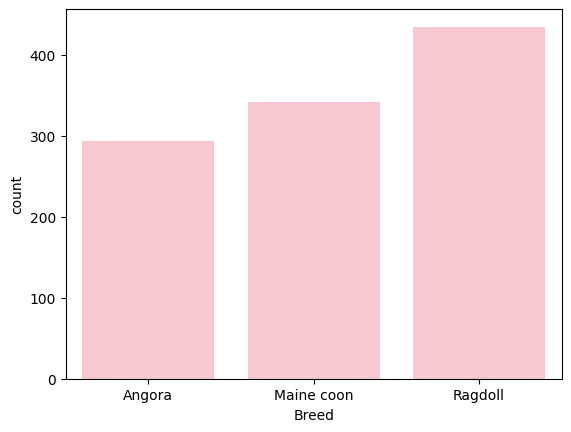

In [28]:
sns.countplot(x=db["Breed"], color="pink")

Text(0.5, 1.0, 'Age Histogram')

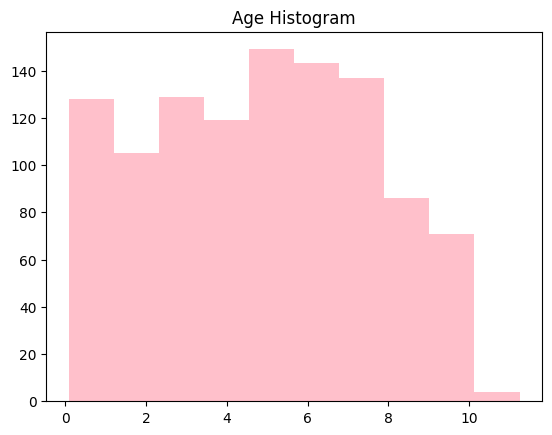

In [29]:
plt.hist(x=db["Age_in_years"], color="pink")
plt.title("Age Histogram")

Most cats live around 6 - 10 years, acording to the graphic.

In [30]:
graphic = px.treemap(
    db,
    path=['Gender', 'Age_in_years'],
    title="Treemap: Age by Gender",
    color='Gender',
    color_discrete_map={
        'male': 'lightblue',       
        'female': 'pink'      
    }
)

graphic.show()


In [31]:
fig = px.parallel_categories(db, dimensions=["Breed", "Country"], title="Breed x Country")
fig.update_traces(line={'color': 'pink'})
fig.show()

[Text(0, 0, '294'), Text(0, 0, '342'), Text(0, 0, '435')]

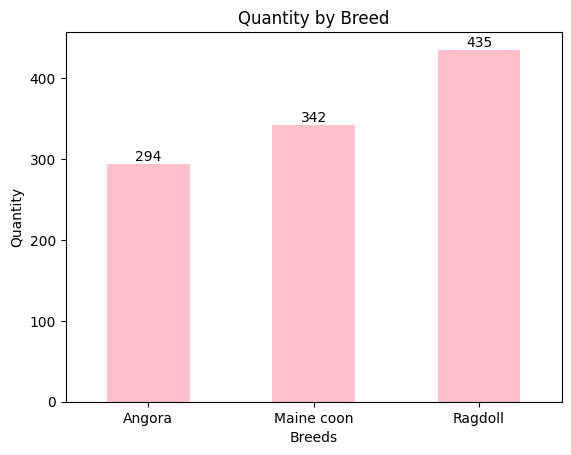

In [32]:
breed = db['Breed'].value_counts().sort_index()
breed = breed.plot(kind="bar", x=db['Breed'], color="pink", xlabel='Breeds', ylabel='Quantity', rot=360, title='Quantity by Breed' )
breed.bar_label(breed.containers[0])

# Clean Data

Now, we shall split the data between the Target and the Explanatory Variables  
**Target**: The result you want to predict  
**Explanatory** Variable: The factor used to make the prediction


In [33]:
db.columns

Index(['Breed', 'Age_in_years', 'Age_in_months', 'Gender',
       'Neutered_or_spayed', 'Body_length', 'Weight', 'Fur_colour_dominant',
       'Fur_pattern', 'Eye_colour', 'Allowed_outdoor', 'Preferred_food',
       'Owner_play_time_minutes', 'Sleep_time_hours', 'Country', 'Latitude',
       'Longitude'],
      dtype='object')

In [34]:
features = [
    'Gender', 'Body_length', 'Weight', 'Fur_colour_dominant', 'Fur_pattern', 'Eye_colour', 'Country', 'Latitude', 'Longitude' ]
target = 'Breed'

clean_base = db[features].copy()
clean_target = db[target].copy()

## Label Encoder

Data preprocessing technique used in machine learning to convert categorical variables into a numerical format.

In [35]:
from sklearn.preprocessing import LabelEncoder

#dictionary to store the LabelEncoders of each feature (categorical column)
features_le = {}
# to prevent from modifing the original data
base_encoded = clean_base.copy()

for feat in features:
    if base_encoded[feat].dtype == 'object':
        # create a LabelEncoder to column and store it in the dictionary
        features_le[feat] = LabelEncoder() 
        # apply the LabelEncoder, converting the categories into numbers
        base_encoded[feat] = features_le[feat].fit_transform(base_encoded[feat])
        
# same process now to the target, but it doesn't need 'for' cuz there's only one column

target_le = LabelEncoder()
target_encoded = clean_target.copy()

if(clean_target.dtype == "object"):
    target_encoded  = target_le.fit_transform(target_encoded)

# transform the result into a Series, with the same variable name

target_encoded = pd.Series(target, name=target)




In [36]:
base_encoded

,Gender,Body_length,Weight,Fur_colour_dominant,Fur_pattern,Eye_colour,Country,Latitude,Longitude
0,0,19,2.0,5,3,1,1,43.296482,5.369780
1,1,19,2.5,5,3,1,1,43.611660,3.877710
2,1,20,2.8,0,3,2,1,44.837789,-0.579180
3,0,21,3.0,5,3,1,1,43.611660,3.877710
4,1,21,3.0,3,4,2,1,48.864716,2.349014
...,...,...,...,...,...,...,...,...,...
1066,0,15,1.2,5,3,1,3,51.507351,-0.127758
1067,0,17,1.0,0,0,1,3,51.507351,-0.127758
1068,1,14,0.7,3,4,1,3,51.507351,-0.127758
1069,1,16,1.1,3,4,2,3,52.486244,-1.890401


In [37]:
target_encoded

0    Breed
Name: Breed, dtype: object

## Standard Scaler

The Standard Scaler is a preprocessing tool used in machine learning to adjust data that are on very different scales. It ensures that all variables in a dataset have equal importance to the model, preventing one variable with very high values ​​from dominating the calculation. It transforms data so that each feature has a mean of 0 and a stardard deviation of 1 and this process, is crucial for many ML algorithms that are sensitive to the scale of the input features.  
\(z= (x- \mu ) / \sigma \)  

where:  
z is the new standardized value  
x is the original value  
\(\mu \) is the mean of the feature's training samples  
\(\sigma \) is the standard deviation of the feature's training samples


In [38]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
base_scaled = scaler.fit_transform(base_encoded)
# target_scaled = scaler.

In [39]:
pd.DataFrame(base_scaled, columns=features)

,Gender,Body_length,Weight,Fur_colour_dominant,Fur_pattern,Eye_colour,Country,Latitude,Longitude
0,-1.000934,-1.533718,-1.525251,1.111687,0.547913,-0.561876,-1.635555,-0.230326,1.445612
1,0.999067,-1.533718,-1.307023,1.111687,0.547913,-0.561876,-1.635555,-0.166828,1.412706
2,0.999067,-1.472379,-1.176085,-1.525922,0.547913,0.479247,-1.635555,0.080198,1.314413
3,-1.000934,-1.411039,-1.088794,1.111687,0.547913,-0.561876,-1.635555,-0.166828,1.412706
4,0.999067,-1.411039,-1.088794,0.056643,1.287907,0.479247,-1.635555,0.891497,1.378992
...,...,...,...,...,...,...,...,...,...
1066,-1.000934,-1.779076,-1.874418,1.111687,0.547913,-0.561876,-0.105036,1.423904,1.324369
1067,-1.000934,-1.656397,-1.961709,-1.525922,-1.672068,-0.561876,-0.105036,1.423904,1.324369
1068,0.999067,-1.840416,-2.092647,0.056643,1.287907,-0.561876,-0.105036,1.423904,1.324369
1069,0.999067,-1.717737,-1.918064,0.056643,1.287907,0.479247,-0.105036,1.621120,1.285495


## Train & Test

In [41]:
from sklearn.model_selection import train_test_split

x = base_scaled.copy()
y = target_encoded.copy()

In [ ]:
import pickle

with open()